# Predicting the "Customer Value" in a retail store as High/Medium/Low

## Problem Statement: 
    
    To predict the Customer value for a retail store based on different quantitative
and qualitative features provided.


The customer value is a profitability metric in terms of a value placed by the company on each customer and can be conceived in two dimensions: the customer`s present Value and potential future Value. A major retail store wants to evaluate customer lvalue in terms of high/medium/low based on each customer’s demographics and purchase information/ sales transactions, to take optimal marketing/promotional decisions and implement appropriate action plans .

### Import prerequisite libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### Read the Data

In [3]:
train_demo= pd.read_csv('Train_Demographics-1546580051604.csv') #demodraphics data
train_tran = pd.read_csv('Train_Transactions-1546579767306.csv') #Transactional data
train = pd.read_csv('Train-1546582083062.csv')

In [4]:
train_demo.head() #it will display the first five rows(by default)

,CustomerId,DOB,gender,MaritalStatus,Familysize
0,C21117,1985-06-14,M,Yes,4
1,C21118,1984-11-21,M,Yes,4
2,C21119,1999-02-01,M,Yes,2
3,C21121,1973-06-22,F,Yes,4
4,C21124,1966-01-02,M,Yes,3


In [5]:
train_tran.head() # it will display the last five rows(by default)

,BillDate,BillNumber,CustomerId,ProductID,Quantity,UnitPrice
0,2013-01-01 8:26,B12551,C25132,PR9338,6,2.55
1,2013-01-01 8:26,B12551,C25132,PR8754,6,3.39
2,2013-01-01 8:26,B12551,C25132,PR8953,8,2.75
3,2013-01-01 8:26,B12551,C25132,PR8905,6,3.39
4,2013-01-01 8:26,B12551,C25132,PR8904,6,3.39


In [6]:
train_tran['Total Price'] = train_tran['Quantity'] * train_tran['UnitPrice'] #Calculating TotalPrice by using Quantity and Sales

In [7]:
train_tran.head(2)

,BillDate,BillNumber,CustomerId,ProductID,Quantity,UnitPrice,Total Price
0,2013-01-01 8:26,B12551,C25132,PR9338,6,2.55,15.30
1,2013-01-01 8:26,B12551,C25132,PR8754,6,3.39,20.34


In [8]:
columns = ['BillDate', 'BillNumber', 'UnitPrice', 'ProductID', 'Quantity'] #Specifying the column names which we want to drop.
train_tran.drop(columns, axis = 1, inplace= True) # Dropping the specified columns
train_tran.head(2)

,CustomerId,Total Price
0,C25132,15.30
1,C25132,20.34


In [9]:
train_tran.dtypes #checking the type of data

CustomerId      object
Total Price    float64
dtype: object

In [10]:
train_demo.head()

,CustomerId,DOB,gender,MaritalStatus,Familysize
0,C21117,1985-06-14,M,Yes,4
1,C21118,1984-11-21,M,Yes,4
2,C21119,1999-02-01,M,Yes,2
3,C21121,1973-06-22,F,Yes,4
4,C21124,1966-01-02,M,Yes,3


In [11]:
train_demo.dtypes

CustomerId       object
DOB              object
gender           object
MaritalStatus    object
Familysize        int64
dtype: object

#### converting into appropriate types

In [12]:
nominal_features_train = ['gender', 'MaritalStatus'] 
nominal_train = train_demo[nominal_features_train]
print (nominal_train.dtypes)
for col in nominal_features_train:
    nominal_train[col] = nominal_train[col].astype('category')
nominal_train.dtypes

gender           object
MaritalStatus    object
dtype: object


gender           category
MaritalStatus    category
dtype: object

In [13]:
nominal_train.head()

,gender,MaritalStatus
0,M,Yes
1,M,Yes
2,M,Yes
3,F,Yes
4,M,Yes


In [14]:
nominal_features_train

['gender', 'MaritalStatus']

#### Performing dummification on nominal data

In [16]:
df = pd.get_dummies(nominal_train, columns=['gender', 'MaritalStatus'], drop_first=True)

In [17]:
df.head(2)

,gender_M,MaritalStatus_Yes
0,1,1
1,1,1


#### Concating with dummified columns

In [18]:
train_demo_final = pd.concat([train_demo, df], axis = 1)
train_demo_final.head()

,CustomerId,DOB,gender,MaritalStatus,Familysize,gender_M,MaritalStatus_Yes
0,C21117,1985-06-14,M,Yes,4,1,1
1,C21118,1984-11-21,M,Yes,4,1,1
2,C21119,1999-02-01,M,Yes,2,1,1
3,C21121,1973-06-22,F,Yes,4,0,1
4,C21124,1966-01-02,M,Yes,3,1,1


#### Dropping the columns after dummification

In [19]:
train_demo_final1 = train_demo_final.drop(['gender', 'MaritalStatus'], axis = 1)
train_demo_final1.head(2)

,CustomerId,DOB,Familysize,gender_M,MaritalStatus_Yes
0,C21117,1985-06-14,4,1,1
1,C21118,1984-11-21,4,1,1


In [21]:
train_demo_final1['DOB']=pd.to_datetime(train_demo_final1['DOB'], format ="%Y/%m/%d") #converting DOB column into appropriate format

###### Calculating age with DOB

In [22]:
from datetime import datetime
from datetime import date
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

Age_train = train_demo_final1.DOB.apply(calculate_age)
type(Age_train)
Age_train = Age_train.rename("Age")
Age_train.head()

0    34
1    34
2    20
3    46
4    53
Name: Age, dtype: int64

In [23]:
train_demo_final1.head()

,CustomerId,DOB,Familysize,gender_M,MaritalStatus_Yes
0,C21117,1985-06-14,4,1,1
1,C21118,1984-11-21,4,1,1
2,C21119,1999-02-01,2,1,1
3,C21121,1973-06-22,4,0,1
4,C21124,1966-01-02,3,1,1


In [24]:
train_demo_final1 = pd.concat([train_demo_final1, Age_train], axis = 1)
train_demo_final1.head()

,CustomerId,DOB,Familysize,gender_M,MaritalStatus_Yes,Age
0,C21117,1985-06-14,4,1,1,34
1,C21118,1984-11-21,4,1,1,34
2,C21119,1999-02-01,2,1,1,20
3,C21121,1973-06-22,4,0,1,46
4,C21124,1966-01-02,3,1,1,53


#### After calculating 'AGE' dropping the column 'DOB'

In [26]:
train_demo_final2 = train_demo_final1.drop('DOB', axis=1)
train_demo_final2.head()

,CustomerId,Familysize,gender_M,MaritalStatus_Yes,Age
0,C21117,4,1,1,34
1,C21118,4,1,1,34
2,C21119,2,1,1,20
3,C21121,4,0,1,46
4,C21124,3,1,1,53


#### Renaming the column name

In [27]:
train_demo_final2 = train_demo_final2.rename(columns={'gender_M': 'Male', 'MaritalStatus_Yes': 'Married'})
train_demo_final2.head()

,CustomerId,Familysize,Male,Married,Age
0,C21117,4,1,1,34
1,C21118,4,1,1,34
2,C21119,2,1,1,20
3,C21121,4,0,1,46
4,C21124,3,1,1,53


#### Merging the datasets on the basis of 'CustomerId'

In [29]:
df_train = pd.merge(train_demo_final2, train_tran, on = ['CustomerId'])
df_train.head()

,CustomerId,Familysize,Male,Married,Age,Total Price
0,C21117,4,1,1,34,25.2
1,C21117,4,1,1,34,17.0
2,C21117,4,1,1,34,39.0
3,C21117,4,1,1,34,23.4
4,C21117,4,1,1,34,15.0


#### Let's check the shape of the dataset

In [30]:
df_train.shape

(320009, 6)

In [31]:
type(df_train)

pandas.core.frame.DataFrame

In [32]:
df_train = df_train.groupby('CustomerId')['Total Price'].sum().reset_index() #groupby with CustomerID and TotalPrice

df_train.head()

,CustomerId,Total Price
0,C21117,4085.18
1,C21118,1797.24
2,C21119,1757.55
3,C21121,2506.04
4,C21124,459.40


In [33]:
df_train = pd.merge(train_demo_final2, df_train, on = ['CustomerId']) #merging the datasets
df_train.head()

,CustomerId,Familysize,Male,Married,Age,Total Price
0,C21117,4,1,1,34,4085.18
1,C21118,4,1,1,34,1797.24
2,C21119,2,1,1,20,1757.55
3,C21121,4,0,1,46,2506.04
4,C21124,3,1,1,53,459.40


In [34]:
df_train.shape

(3315, 6)

#### Let's check for NULL values

In [36]:
df_train.isnull().sum()

CustomerId     0
Familysize     0
Male           0
Married        0
Age            0
Total Price    0
dtype: int64

There is no null values present in the dataset.

#### Let's check the summary of the data.

In [37]:
df_train.describe()

,Familysize,Male,Married,Age,Total Price
count,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,2.775867,0.491403,0.961388,40.528507,2240.531161
std,0.975943,0.500002,0.192698,18.872232,9273.947194
min,1.000000,0.000000,0.000000,17.000000,2.900000
25%,2.000000,0.000000,1.000000,25.000000,515.610000
50%,2.000000,0.000000,1.000000,35.000000,859.350000
75%,4.000000,1.000000,1.000000,51.000000,1740.455000
max,4.000000,1.000000,1.000000,87.000000,268452.530000


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315 entries, 0 to 3314
Data columns (total 6 columns):
CustomerId     3315 non-null object
Familysize     3315 non-null int64
Male           3315 non-null uint8
Married        3315 non-null uint8
Age            3315 non-null int64
Total Price    3315 non-null float64
dtypes: float64(1), int64(2), object(1), uint8(2)
memory usage: 136.0+ KB


In [39]:
train.head()

,CustomerId,CustomerValue
0,C22981,High
1,C28576,Low
2,C23809,Low
3,C29339,Low
4,C30598,Low


In [40]:
df_train = pd.merge(train, df_train, on = ['CustomerId'])
df_train.head()

,CustomerId,CustomerValue,Familysize,Male,Married,Age,Total Price
0,C22981,High,4,0,1,28,1237.85
1,C28576,Low,3,0,1,27,961.52
2,C23809,Low,2,0,1,19,408.90
3,C29339,Low,2,1,1,23,233.25
4,C30598,Low,2,0,1,22,1271.06


In [41]:
df_train.shape

(3315, 7)

In [42]:
df_train.dtypes

CustomerId        object
CustomerValue     object
Familysize         int64
Male               uint8
Married            uint8
Age                int64
Total Price      float64
dtype: object

In [67]:
print(df_train.head())

  CustomerId CustomerValue  Familysize  Male  Married  Age  Total Price
0     C22981          High           4     0        1   28      1237.85
1     C28576           Low           3     0        1   27       961.52
2     C23809           Low           2     0        1   19       408.90
3     C29339           Low           2     1        1   23       233.25
4     C30598           Low           2     0        1   22      1271.06


In [43]:
df_train['CustomerValue'].value_counts() #checking the values in target column

Low       1415
Medium    1116
High       784
Name: CustomerValue, dtype: int64

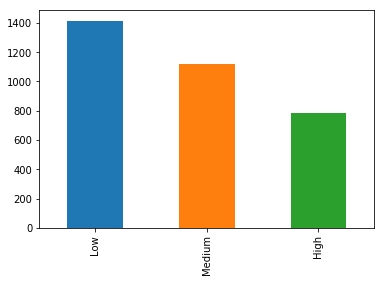

In [44]:
df_train['CustomerValue'].value_counts().plot.bar()

#### Numerical values in dataset

In [45]:
df_train_num = df_train.loc[:,['Age','Total Price']]
df_train_num.head()

,Age,Total Price
0,28,1237.85
1,27,961.52
2,19,408.90
3,23,233.25
4,22,1271.06


#### Categorical values in dataset

In [46]:
df_train_cat = df_train.loc[:,['CustomerId','Familysize', 'Married', 'Male', 'CustomerValue']]
df_train_cat.head()

,CustomerId,Familysize,Married,Male,CustomerValue
0,C22981,4,1,0,High
1,C28576,3,1,0,Low
2,C23809,2,1,0,Low
3,C29339,2,1,1,Low
4,C30598,2,1,0,Low


### Scaling Using MinMaxScaler for numerical datas

In [52]:
# Standardize = StandardScaler()
# df_train_num_scaled=Standardize.fit_transform(df_train_num)
# df_train_num_scaled=pd.DataFrame(df_train_num_scaled)

In [53]:
# df_train_num_scaled.head()

In [54]:
#Scaling using MinMaxScaler for train dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_train_num[['Total Price']])
df_train_num['Total Price'] = scaler.transform(df_train_num[['Total Price']])

scaler.fit(df_train_num[['Age']])
df_train_num['Age'] = scaler.transform(df_train_num[['Age']])

In [55]:
df_train_num.head()

,Age,Total Price
0,0.157143,0.004600
1,0.142857,0.003571
2,0.028571,0.001512
3,0.085714,0.000858
4,0.071429,0.004724


In [57]:
df_train_final = pd.concat([df_train_num, df_train_cat], axis = 1)
df_train_final.head() #This is the final train dataset

,Age,Total Price,CustomerId,Familysize,Married,Male,CustomerValue
0,0.157143,0.004600,C22981,4,1,0,High
1,0.142857,0.003571,C28576,3,1,0,Low
2,0.028571,0.001512,C23809,2,1,0,Low
3,0.085714,0.000858,C29339,2,1,1,Low
4,0.071429,0.004724,C30598,2,1,0,Low


### Splitting the data

In [58]:
X = df_train_final.drop(['CustomerValue', 'CustomerId'], axis = 1) #independent variable
Y = df_train_final['CustomerValue'] #dependent variable

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100) #splitting the dataset into train and test in the ratio 70:30

In [60]:
print(X_train.shape) #ckecking the shape
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2320, 5)
(995, 5)
(2320,)
(995,)


## Building Models

### Logistic Regression

In [63]:
Lr1=LogisticRegression(multi_class='multinomial',solver='lbfgs') #its a multinomial classification problem
Lr1.fit(X_train,Y_train) #fitting in train data
pred_Lr=Lr1.predict(X_test)
pred_Lr #prediction on test data

array(['Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'Low', 'Medium', 'Low', 'High', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       'Low', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Medium',
       'Medium', 'Low', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium',
       'Low', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'High', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium',
       'Low', 'High', 'High', 'Low', 'High', 'Medium', 'High', 'Low',
       'Low', 'High', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'High',
       'High', 'Low', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'High', 'High', 'Low',
       

#### Displaying Accuracy and classification report

In [64]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(Y_test,pred_Lr)
print('Accuracy on train data:',score)
print("classification_report : ",classification_report(Y_test,pred_Lr))

Accuracy on train data: 0.5457286432160804
classification_report :                precision    recall  f1-score   support

        High       0.50      0.29      0.37       244
         Low       0.65      0.79      0.71       420
      Medium       0.41      0.42      0.42       331

   micro avg       0.55      0.55      0.55       995
   macro avg       0.52      0.50      0.50       995
weighted avg       0.53      0.55      0.53       995



### Naive Bayes classifier

In [65]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test) 
gnb_predictions

array(['Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'High', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium',
       'Low', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Low',
       'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium',
       'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'High',
       'Low', 'Medium', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       

In [66]:
print("accuracy_score : ",accuracy_score(Y_test,gnb_predictions))
print("classification_report : ",classification_report(Y_test,gnb_predictions))

accuracy_score :  0.5557788944723618
classification_report :                precision    recall  f1-score   support

        High       0.47      0.10      0.17       244
         Low       0.62      0.87      0.72       420
      Medium       0.46      0.49      0.48       331

   micro avg       0.56      0.56      0.56       995
   macro avg       0.52      0.49      0.46       995
weighted avg       0.53      0.56      0.51       995



### KNN classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test) 
knn_predictions

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'Low', 'High', 'High', 'High', 'High',
       'Low', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'High', 'Low',
       'Medium', 'High', 'Low', 'Medium', 'Low', 'High', 'Low', 'High',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Medium', 'High', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium',
       'Medium', 'Low', 'Low', 'Low', 'High', 'Medium', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'Medium', 'High', 'Low', 'Low', 'Low', 'High',
       'Medium', 'High', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium',
 

In [68]:
print("accuracy_score : ",accuracy_score(Y_test,knn_predictions))
print("classification_report : ",classification_report(Y_test,knn_predictions))

accuracy_score :  0.6231155778894473
classification_report :                precision    recall  f1-score   support

        High       0.61      0.48      0.54       244
         Low       0.68      0.86      0.76       420
      Medium       0.52      0.43      0.47       331

   micro avg       0.62      0.62      0.62       995
   macro avg       0.60      0.59      0.59       995
weighted avg       0.61      0.62      0.61       995



### Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0)
dtree_model.fit(X_train, Y_train)
dtree_predictions = dtree_model.predict(X_test)
dtree_predictions

array(['Low', 'Medium', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'Medium', 'Medium',
       'High', 'Low', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'High',
       'Low', 'Medium', 'High', 'Medium', 'High', 'Low', 'High', 'Low',
       'High', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium',
       'Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'High', 'Low', 'High', 'High',
       'Low', 'High', 'Medium', 'High', 'Medium', 'Low', 'High', 'Medium',
       'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Low',
       'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low',
       'Low', 'Low', 'Low', 'High', 'Medium', 'Low', 'Hig

In [70]:
print("accuracy_score : ",accuracy_score(Y_test,dtree_predictions))
print("classification_report : ",classification_report(Y_test,dtree_predictions))

accuracy_score :  0.650251256281407
classification_report :                precision    recall  f1-score   support

        High       0.52      0.45      0.48       244
         Low       0.77      0.86      0.81       420
      Medium       0.56      0.53      0.54       331

   micro avg       0.65      0.65      0.65       995
   macro avg       0.62      0.61      0.61       995
weighted avg       0.64      0.65      0.64       995



### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
rf_predictions = rf.predict(X_test)
rf_predictions

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Medium', 'High',
       'High', 'Low', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'High',
       'Low', 'Medium', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'High', 'Low', 'High', 'Low', 'High',
       'High', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Low', 'High',
       'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low',
       'Medium', 'Low', 'Low', 'High', 'High', 'Low', 'Medium', 'H

In [72]:
print("accuracy_score : ",accuracy_score(Y_test,rf_predictions))
print("classification_report : ",classification_report(Y_test,rf_predictions))

accuracy_score :  0.6673366834170854
classification_report :                precision    recall  f1-score   support

        High       0.57      0.57      0.57       244
         Low       0.77      0.87      0.82       420
      Medium       0.58      0.48      0.53       331

   micro avg       0.67      0.67      0.67       995
   macro avg       0.64      0.64      0.64       995
weighted avg       0.66      0.67      0.66       995



### Model Scores

In [105]:
lr_score = Lr1.score(X_test,Y_test)
print(f'Logistic Regression classifier: {lr_score}\n')
gnb_score = gnb.score(X_test,Y_test)
print(f'Naive Bayes classifier: {gnb_score}\n')
knn_score = knn.score(X_test,Y_test)
print(f'KNN (k-nearest neighbours) classifier: {knn_score}\n')
dt_score = dtree_model.score(X_test,Y_test)
print(f'Decision tree classifier: {dt_score}\n')
rf_score = rf.score(X_test,Y_test)
print(f'Random Forest Classifier: {rf_score}\n')

Logistic Regression classifier: 0.5457286432160804

Naive Bayes classifier: 0.5557788944723618

KNN (k-nearest neighbours) classifier: 0.6160804020100502

Decision tree classifier: 0.6512562814070352

Random Forest Classifier: 0.6834170854271356



The best accuracy is given by the Random Forest classifier. The accuracy is 68.3%. So the future work is to do the hyper parameter tuning and grid search.